In [1]:
library('igraph')
#library(repr)

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'repr' was built under R version 3.4.4"

In [2]:
df <-read.table("facebook_combined.txt",header=FALSE)
fb <- graph.data.frame(df, directed = FALSE)

In [3]:
plot_func <- function(sg1, maxval, node,col){
    fg1 = fastgreedy.community(sg1)
    mem = fg1$membership+1
    v_color = mem+1
    v_size = rep(2.5, length(v_color))
    edge_color = rep("grey", length(E(sg1)))
    edge_wt = rep(0.5,length(E(sg1)))
    
    maxnode = which(sg1$name==maxval)
    
    edge_color[which(get.edgelist(sg1, name = FALSE)[,1] == maxnode | 
                    get.edgelist(sg1, name = FALSE)[,2] == maxnode)] = col;
    edge_wt[which(get.edgelist(sg1, name = FALSE)[,1] == maxnode |  
                     get.edgelist(sg1, name = FALSE)[,2] == maxnode)] = 3;
  
    v_size[maxnode] = 5
    v_color[maxnode] = col
    node=which(sg1$name==node)
    v_size[node] = 4
    v_color[node] = "green"
    #print(node)
  
  plot.igraph(sg1, vertex.size = v_size , vertex.label = NA , edge.width = edge_wt, asp=9/14, layout=layout.fruchterman.reingold,
        edge.color =  edge_color, vertex.color = v_color)
}

[1] "Disp: 49  Emb: 49  Ratio: 21"


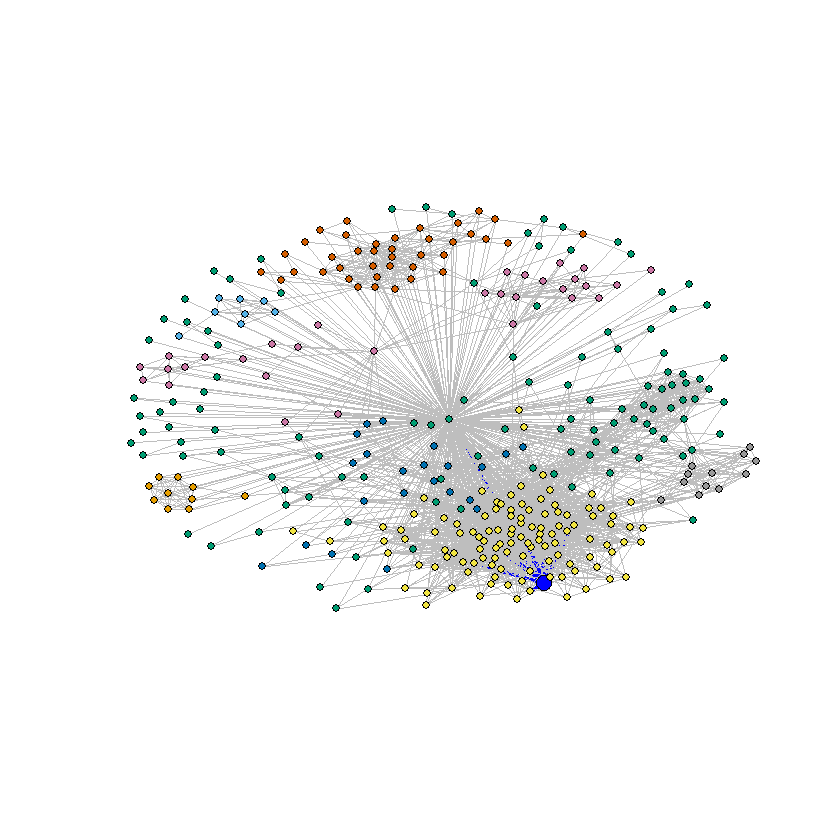

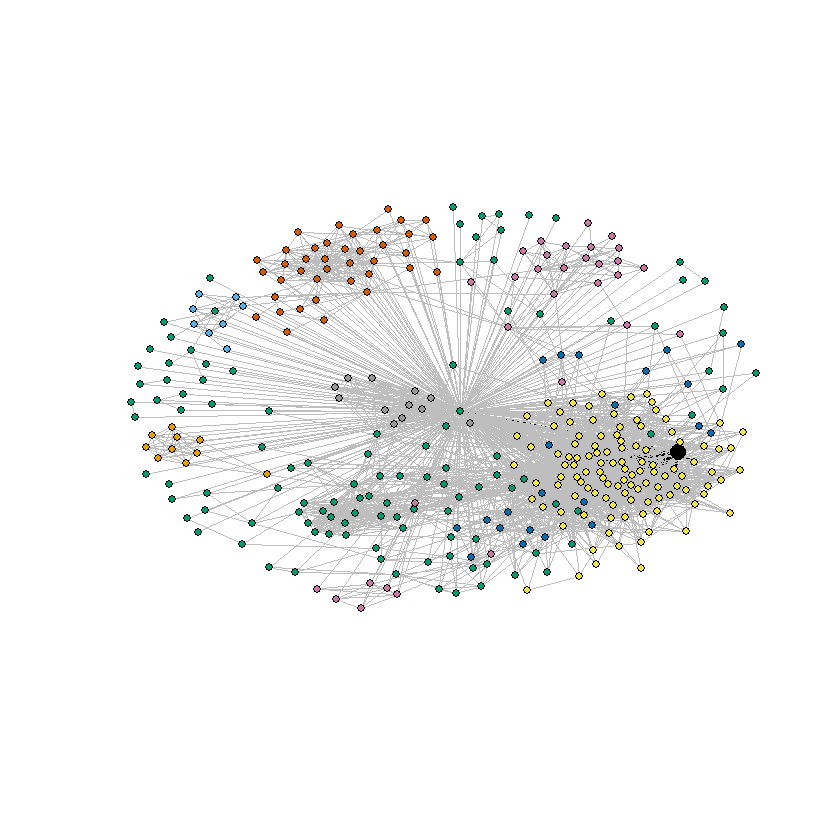

[1] "Disp: 1712  Emb: 1712  Ratio: 1712"


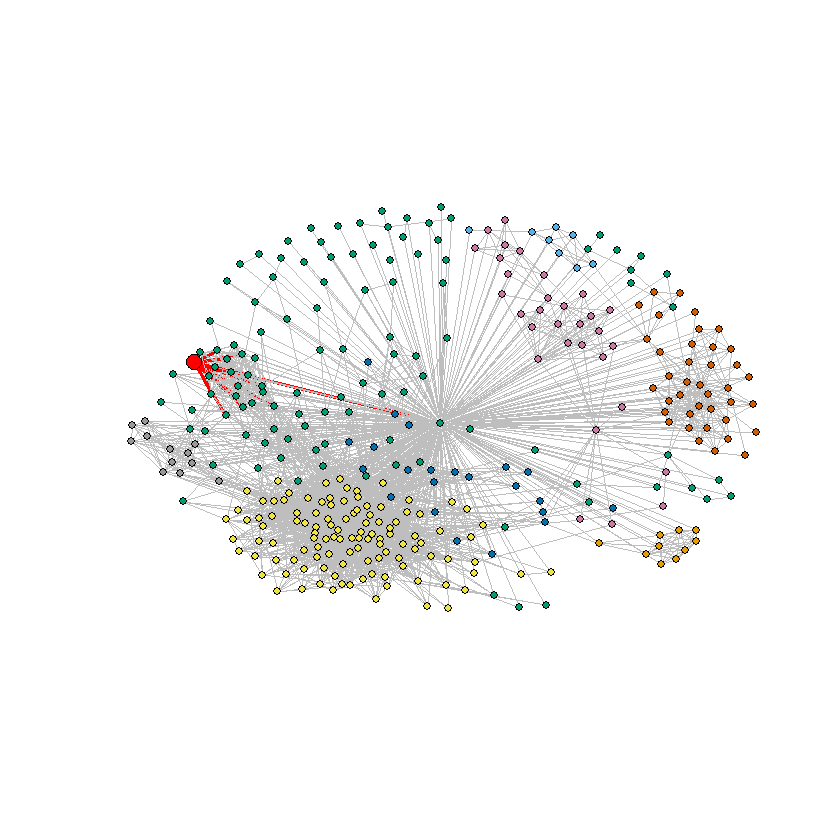

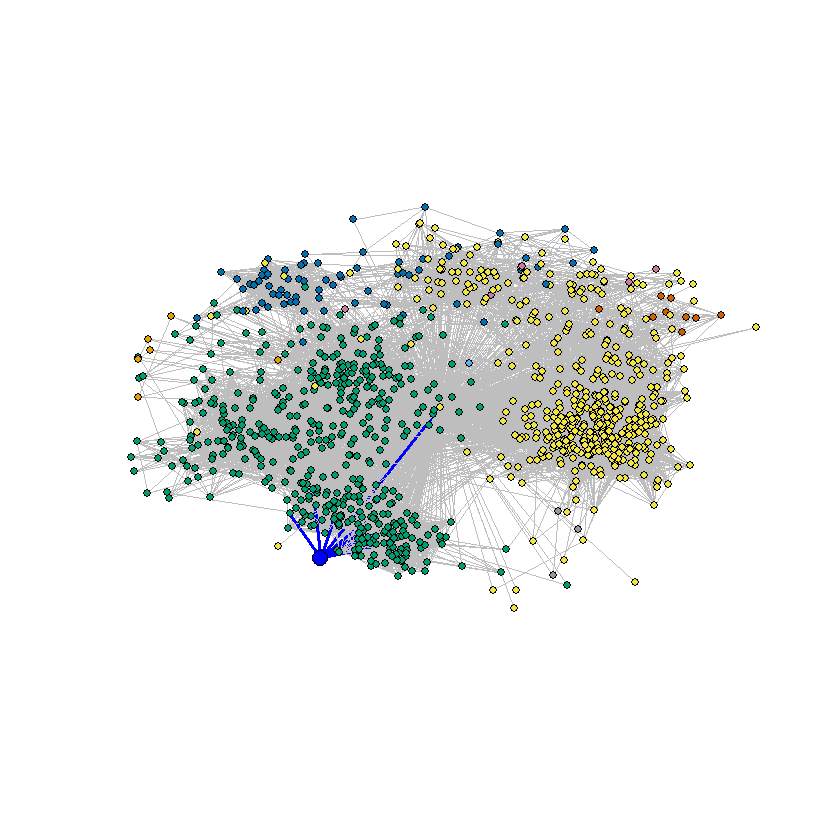

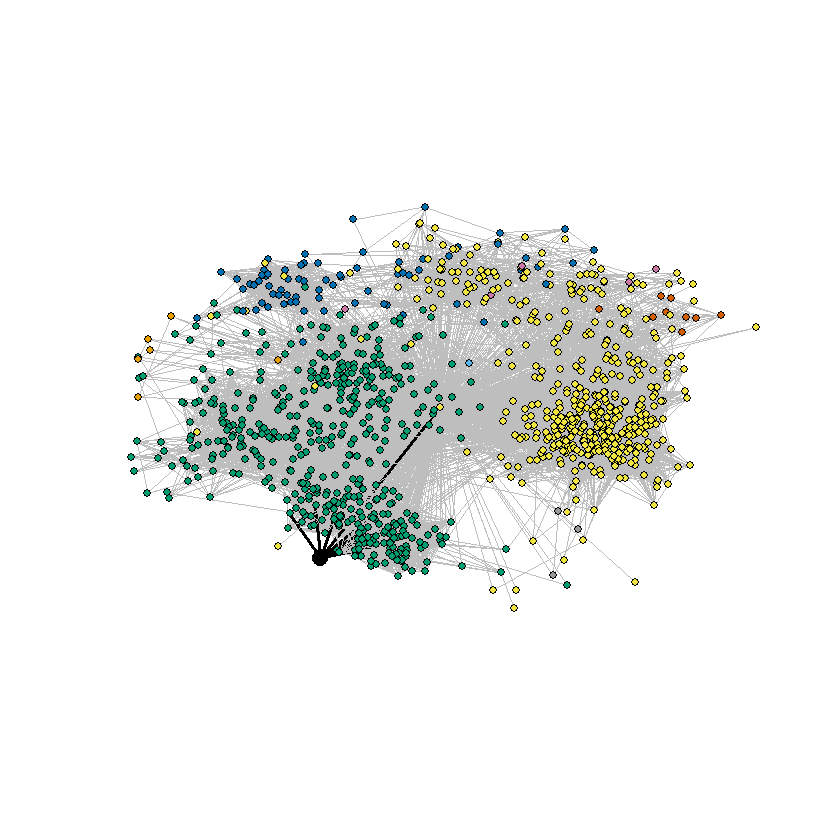

[1] "Disp: 314  Emb: 314  Ratio: 314"


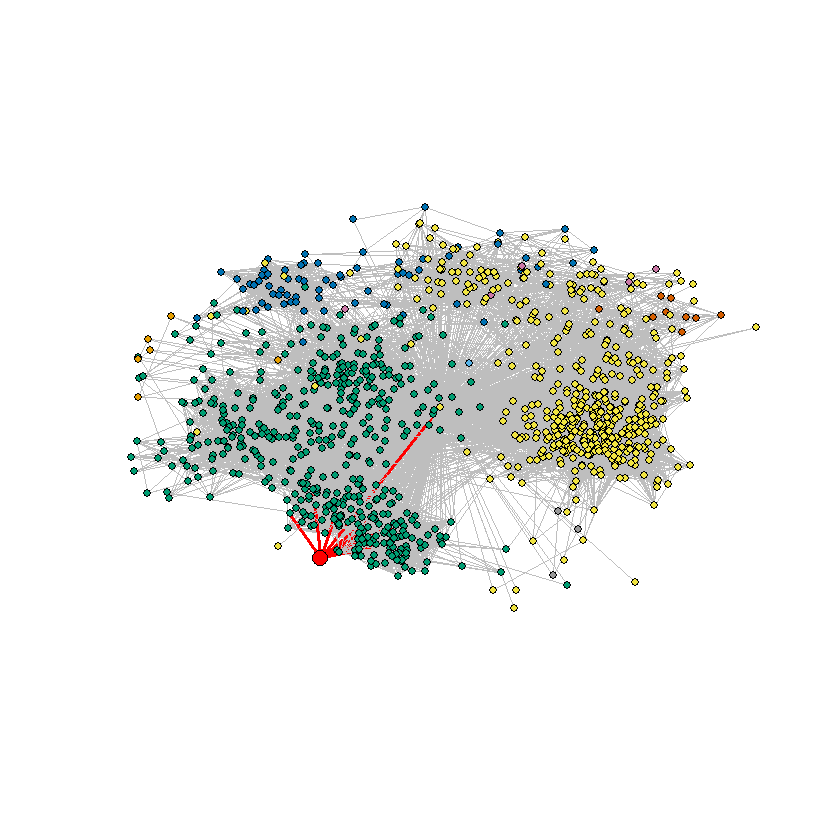

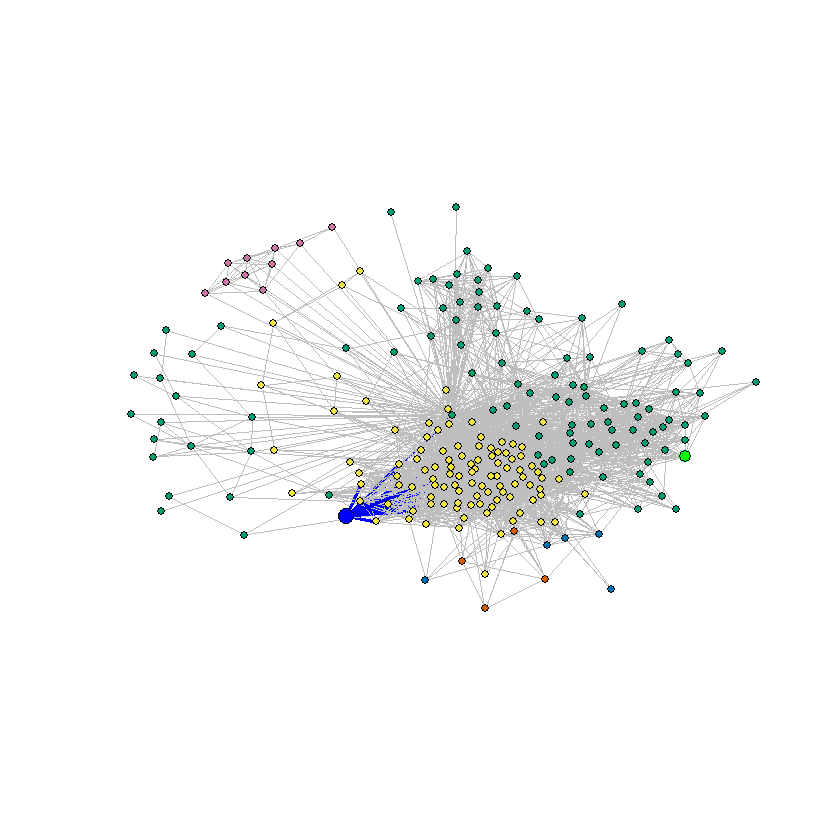

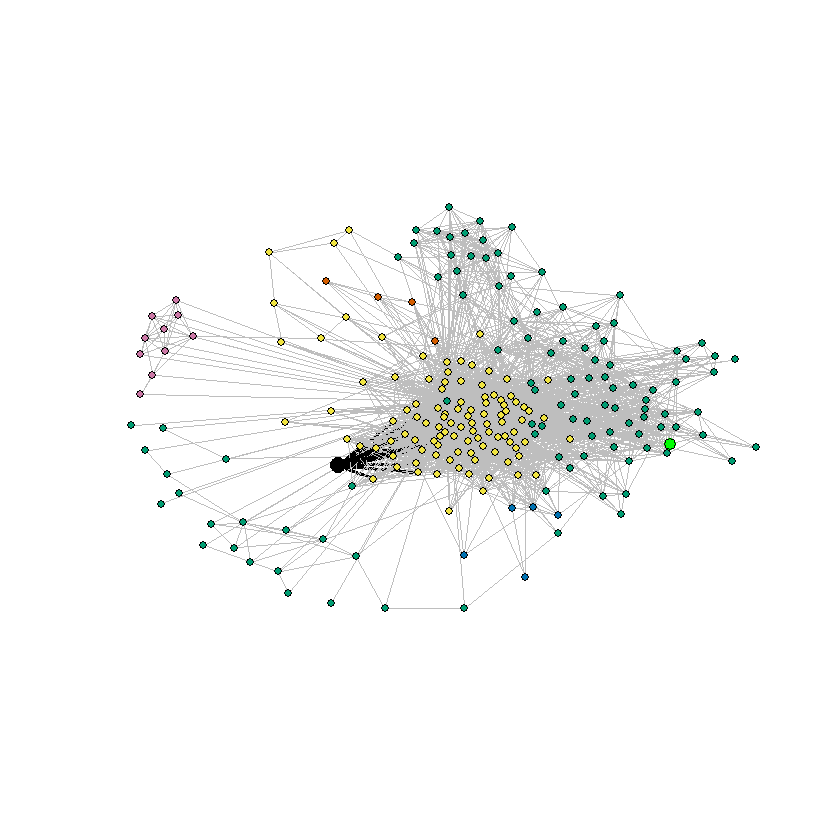

[1] "Disp: 100  Emb: 100  Ratio: 100"


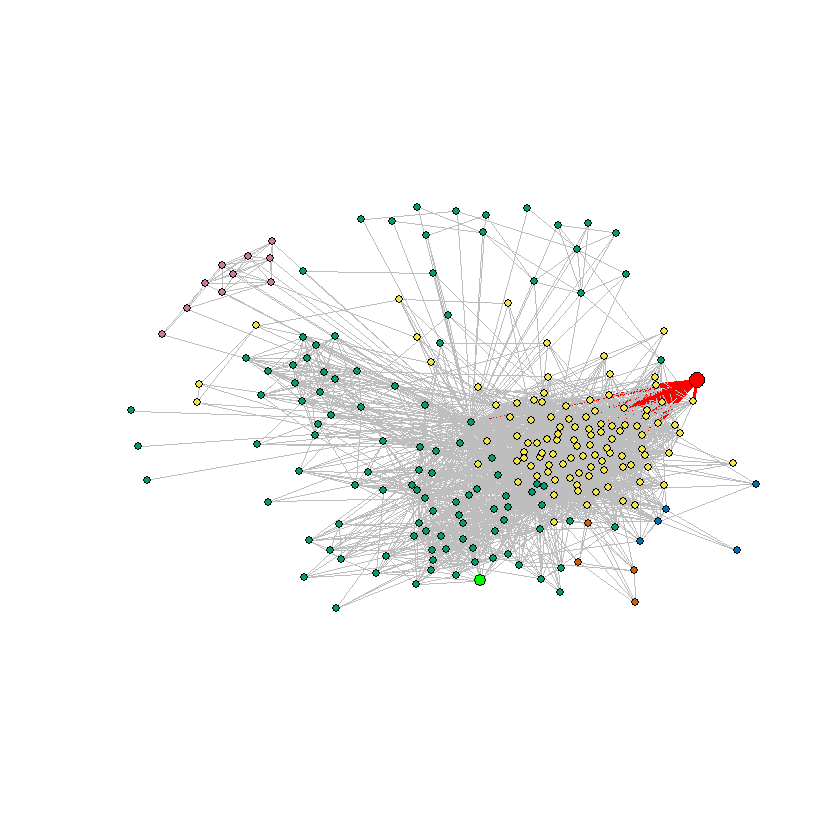

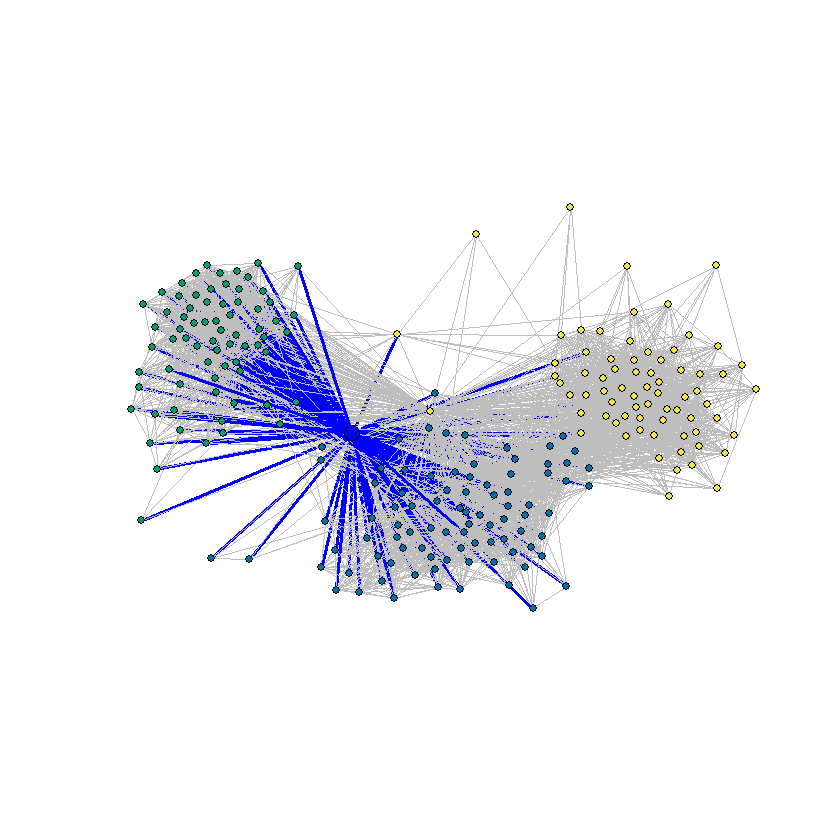

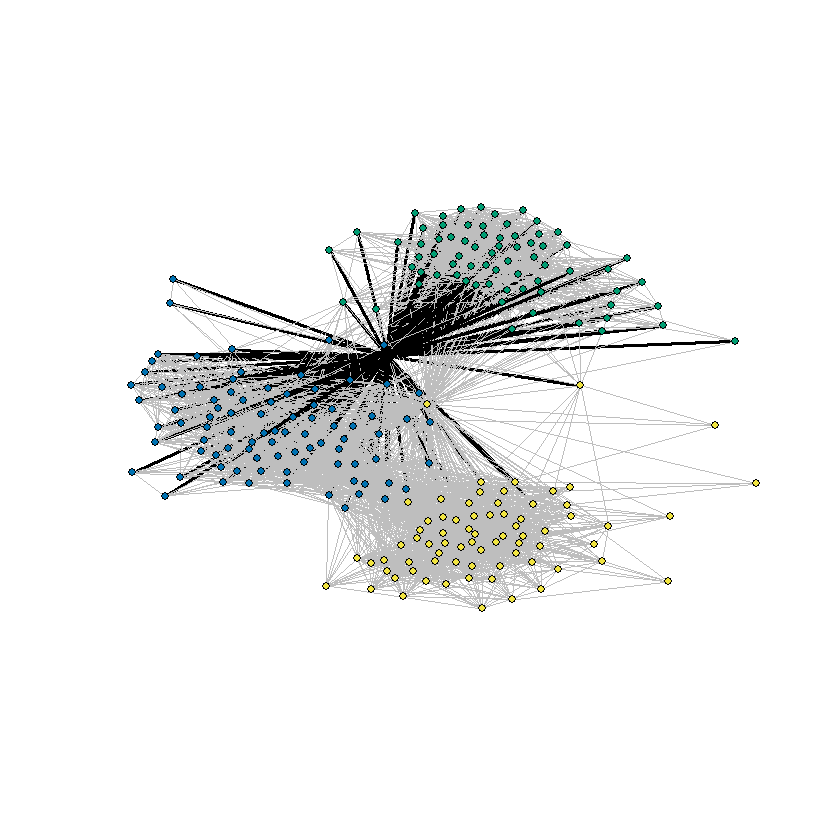

[1] "Disp: 100  Emb: 100  Ratio: 100"


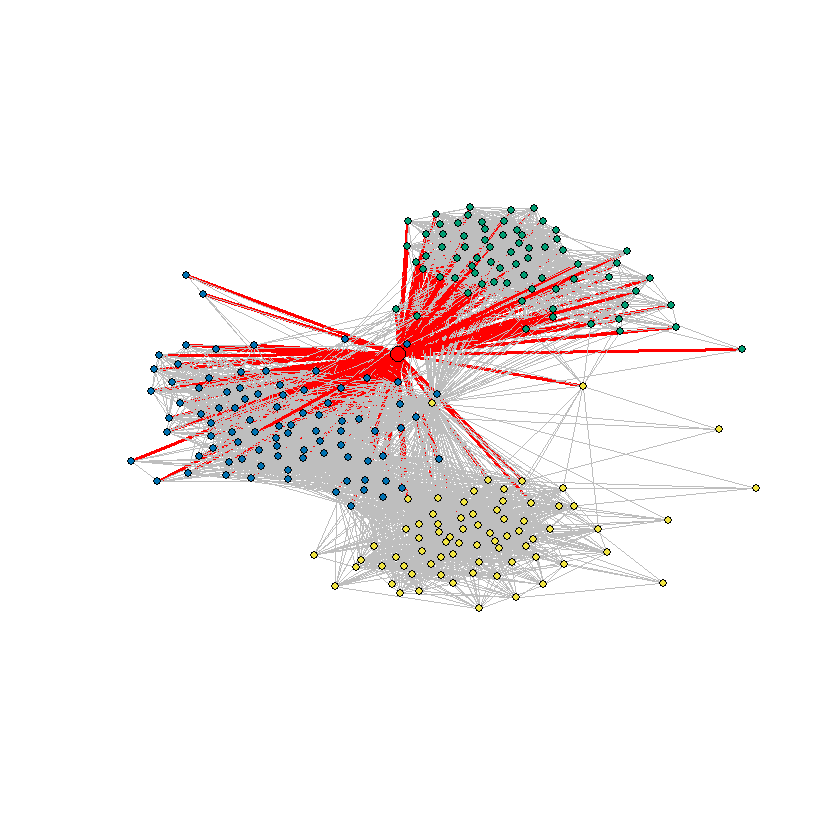

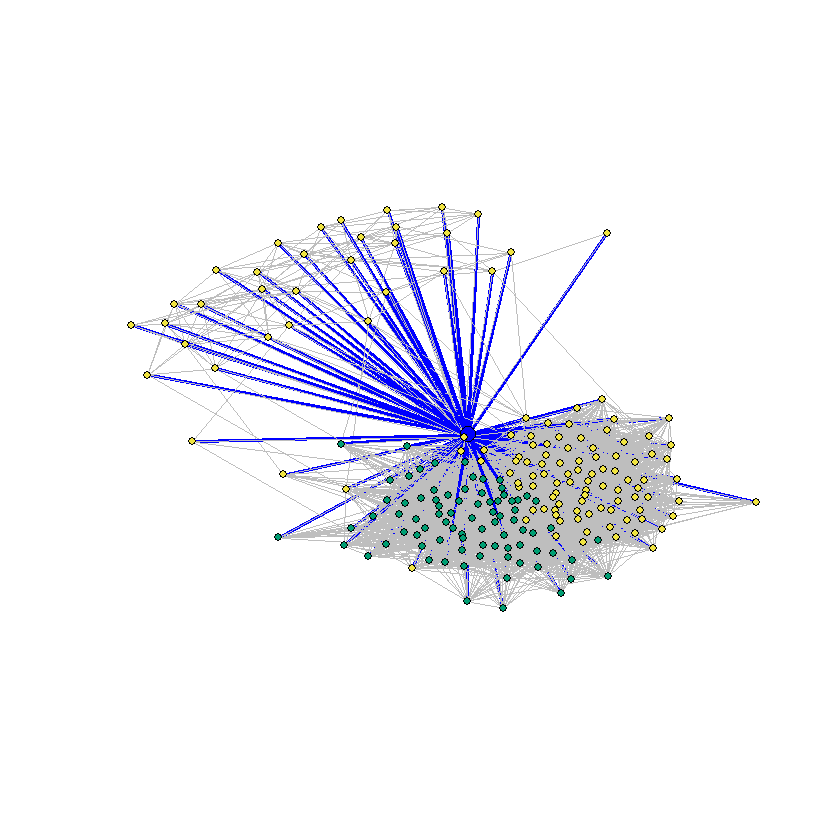

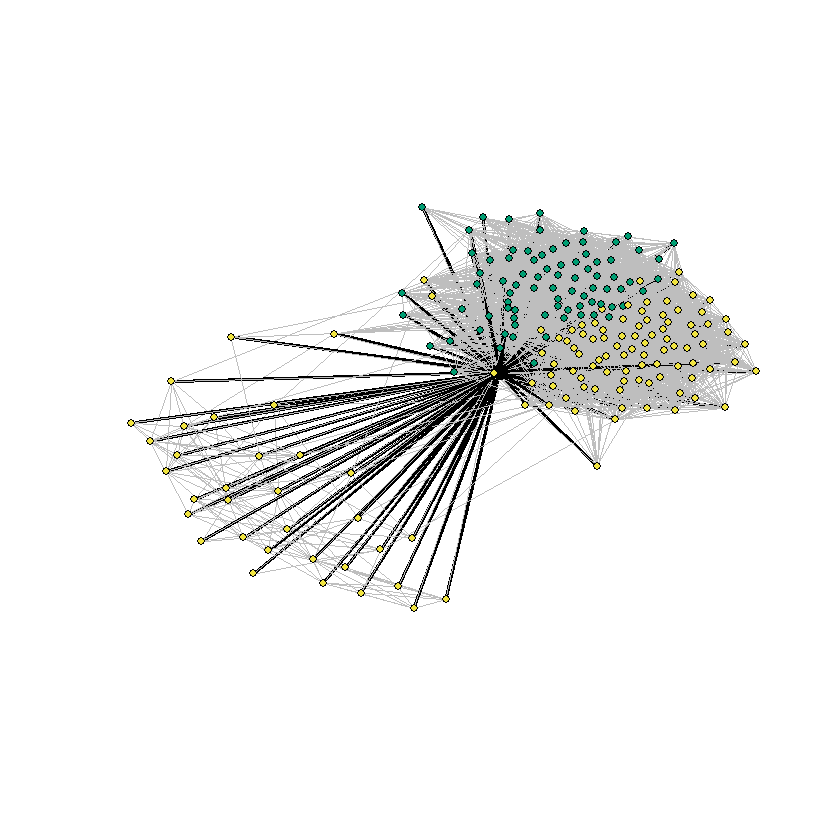

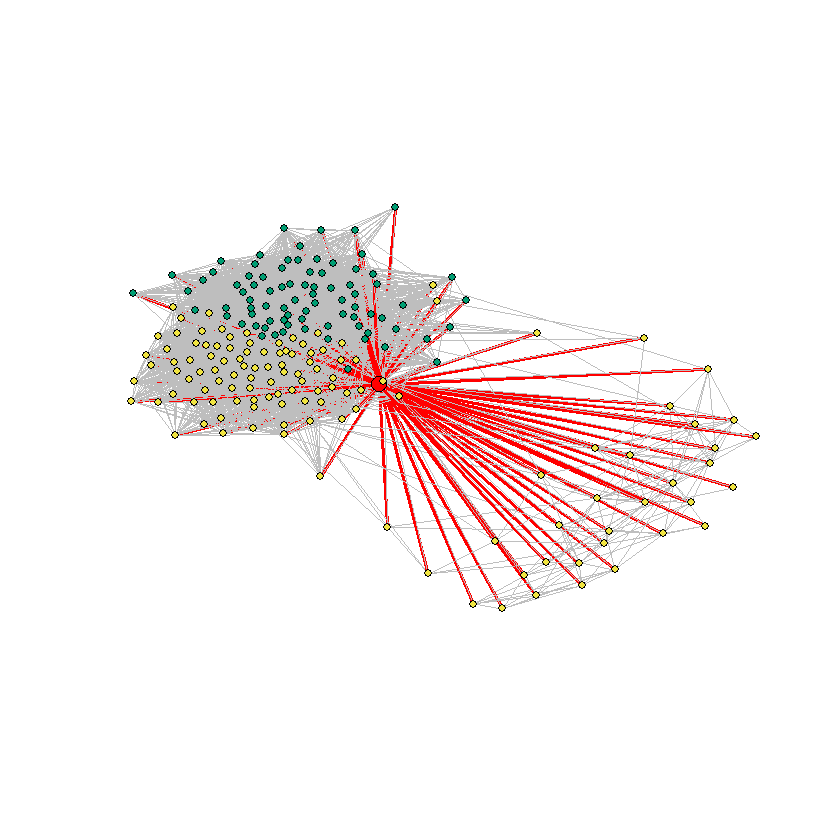

In [5]:
#corelist = c(1,100,288,419,954)
corelist1 = c("0","107","348","483","1086")
for(j in c(1:5)){
    nodelist = unlist(ego(fb, order=1, nodes = corelist1[j]))
    sg1 = induced.subgraph(fb,nodelist)
    sg1$name = sort(nodelist)
    emb = c()
    disp = c()
    deg=c()
    i=1
    
    for(v in vertex_attr(sg1)$name){ 
        if(v==corelist1[j])
            next
            
        disp[i] = 0
        mutual = intersect(neighbors(sg1, corelist1[j]), neighbors(sg1,v))
        emb[i] = length(mutual)
        deg[i] = degree(sg1,v)
        #creating modified subgraph
        sg2 = delete.vertices(sg1, c(corelist1[j], v))
        
        if(emb[i]>1){
            vert = c()
            for(m in 1:length(mutual)){
                vert =  c(vert,vertex_attr(sg1)$name[mutual[m]])
            }
            #print(vert)
            vert1=c()
            for(m in 1:length(vert)){
                vert1=c(vert1,which(vertex_attr(sg2)$name==vert[m]))
            }
            matrix = shortest.paths(sg2,v=vert1, to=vert1)
            matrix[matrix==Inf]<-diameter(sg2)+1
            disp[i] = sum(matrix)
        }
        i=i+1
        
    } 
    node = corelist1[j]
    jpeg(paste(node,'_emb.jpg',sep = ""))
    hist(emb,main="Distribution of Embeddedness", xlab="Embeddedness",ylab="Frequency")
    dev.off()
    
    #plot(deg, emb)
    jpeg(paste(node,'_disp.jpg',sep = ""))
    hist(disp,main="Distribution of Dispersion", xlab="Dispersion",ylab="Frequency")
    dev.off()
        
    maxdisp = sg1$name[which(disp==max(disp))]
    maxemb = sg1$name[which(emb==max(emb))]
    ratio = disp/emb
    ratio[mapply(is.nan,ratio)]=0
    maxratio=sg1$name[which(ratio==max(ratio))]
    print(paste("Disp:",maxdisp," Emb:",maxemb, " Ratio:", maxratio))
        
    plot_func(sg1,maxdisp, node,"blue")
    plot_func(sg1,maxemb, node,"black")
    plot_func(sg1,maxratio, node,"red")
}